<a href="https://colab.research.google.com/github/The23ird/The23ird/blob/main/Customer_Data_Analysis_Learnable_LST_Alikwe_Ortega_May_25_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from IPython import get_ipython
from IPython.display import display
from google.colab import files
import pandas as pd
uploaded = files.upload()
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}"')
  filename = fn
df = pd.read_csv(filename)

df.head()
df = pd.read_csv('ecommerce_customer_data.csv')

Saving ecommerce_customer_data.csv to ecommerce_customer_data (1).csv
User uploaded file "ecommerce_customer_data (1).csv"


# Section 1

In [13]:
#summary of the table
df.head()
df.describe()

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000


# Section 2


In [14]:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


np.int64(0)

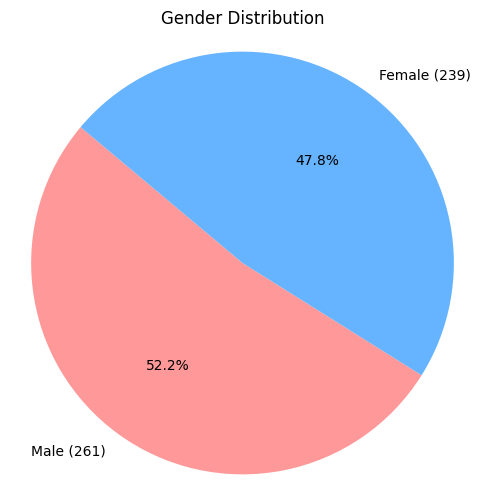

In [6]:
 # Calculate the count of each gender
gender_counts = df['Gender'].value_counts()

# Create labels with both gender and count
labels_with_counts = [f'{gender} ({count})' for gender, count in gender_counts.items()]

# Create a pie chart
plt.figure(figsize=(6, 6)) # Set the figure size for the pie chart
plt.pie(gender_counts, labels=labels_with_counts, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff']) # Create the pie chart with modified labels
plt.title('Gender Distribution') # Add a title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show() # Display the plot

# Section 3


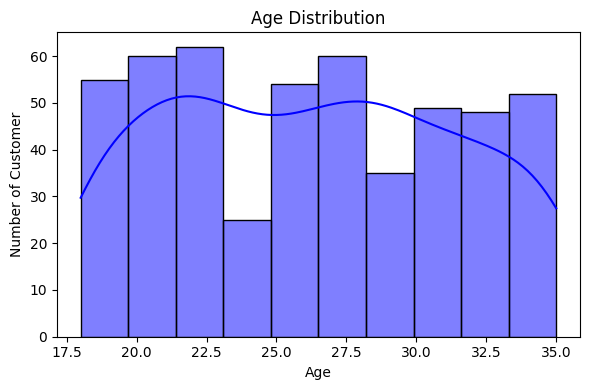

In [19]:
#Visualize customer age distribution.
#Create a figure with a specified size (width=6 inches, height=4 inches).
plt.figure(figsize=(6 , 4))

#Generate a histogram of the 'Age' column.
#- bins shows the number of intervals for the histogram.
#- kde display the kernel density estimate.
#- color sets the color of the plot elements.
sns.histplot(df["Age"], bins=10, kde=True, color="blue")

#Set the title of the plot.
plt.title('Age Distribution')

#Set the label for the x-axis.
plt.xlabel('Age')

#Set the label for the y-axis.
plt.ylabel('Number of Customer')

#Adjust plot layout to prevent overlaps.
plt.tight_layout()

#Display the plot.
plt.show()


# Section 4

<Axes: title={'center': 'Top 10 Locations'}, ylabel='Location'>

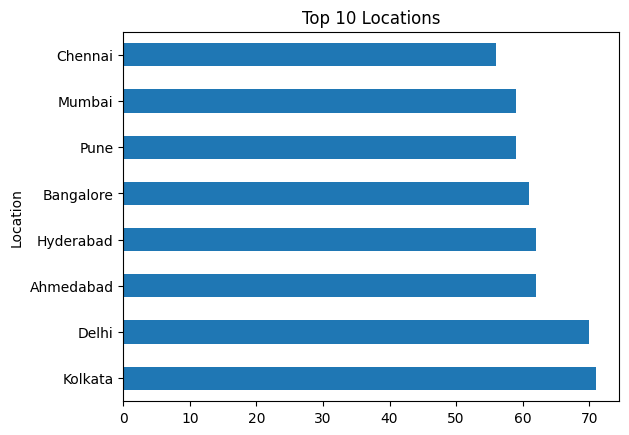

In [20]:
#To understand the customer demographics in light of location
#Select the 'Location' column from the DataFrame.
#This column contains the geographical location information for each customer.
df['Location']

#Count the occurrences of each unique value in the 'Location' column.
#This tells us how many customers are associated with each specific location.
#The result is a Series with locations as the index and counts as values.
df['Location'].value_counts()

# We Select the top 10 most frequent locations from the results of
# value_counts(). We are focusing on the locations with the highest number of
# customers.
df['Location'].value_counts().head(10)

# We generate a plot of the top 10 locations.
# kind='barh' specifies a horizontal bar plot.
# title="Top 10 Locations" sets the title of the plot for clarity.
df['Location'].value_counts().head(10).plot(kind='barh', title="Top 10 Locations")


Section 4.5

In [8]:
#Group data by Location and calculate average browsing time and total purchases
location_behavior = df.groupby('Location').agg({
    'Product_Browsing_Time': 'mean',
    'Total_Purchases': 'sum'
    #Using sum for purchases as a placement for total purchases per location
}).reset_index()

#Rank locations based on average browsing time
location_behavior['Browsing_Rank'] = location_behavior['Product_Browsing_Time'].rank(ascending=False)

#Rank locations based on total purchases
location_behavior['Purchase_Rank'] = location_behavior['Total_Purchases'].rank(ascending=True)

#Sort by Browsing_Rank (high browsing) and then Purchase_Rank (low purchases)
#to find cities fitting the criteria
cities_high_browsing_low_purchase = location_behavior.sort_values(by=['Browsing_Rank', 'Purchase_Rank'])

#Display the top cities that fit this profile
print("Cities with High Browsing and Low Purchase:")

# Displaying the top 10
display(cities_high_browsing_low_purchase.head(10))



Cities with High Browsing and Low Purchase:


,Location,Product_Browsing_Time,Total_Purchases,Browsing_Rank,Purchase_Rank
5,Kolkata,33.436620,190,1.0,7.0
4,Hyderabad,33.322581,138,2.0,2.0
1,Bangalore,32.540984,147,3.0,5.0
6,Mumbai,30.423729,145,4.0,4.0
0,Ahmedabad,29.725806,152,5.0,6.0
3,Delhi,29.371429,191,6.0,8.0
7,Pune,29.338983,126,7.0,1.0
2,Chennai,27.142857,143,8.0,3.0


# Section 5


<ipython-input-16-2a2aeb9d5ff4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Device_Type', y=metric, data=df, palette='Set2')


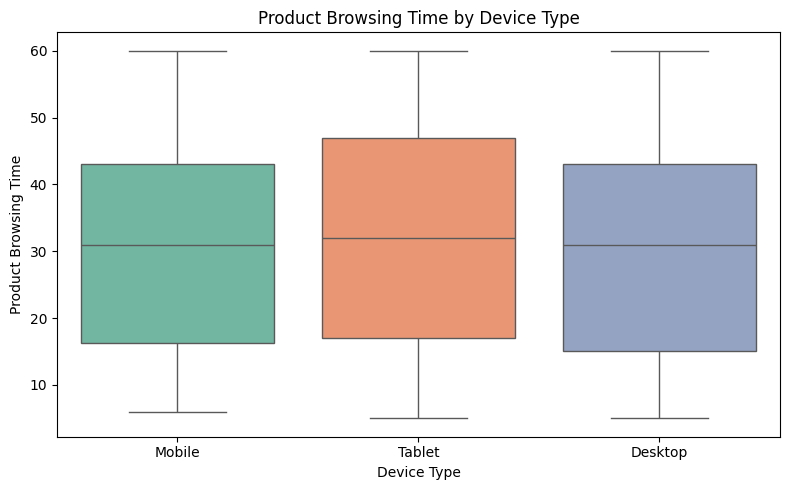

<ipython-input-16-2a2aeb9d5ff4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Device_Type', y=metric, data=df, palette='Set2')


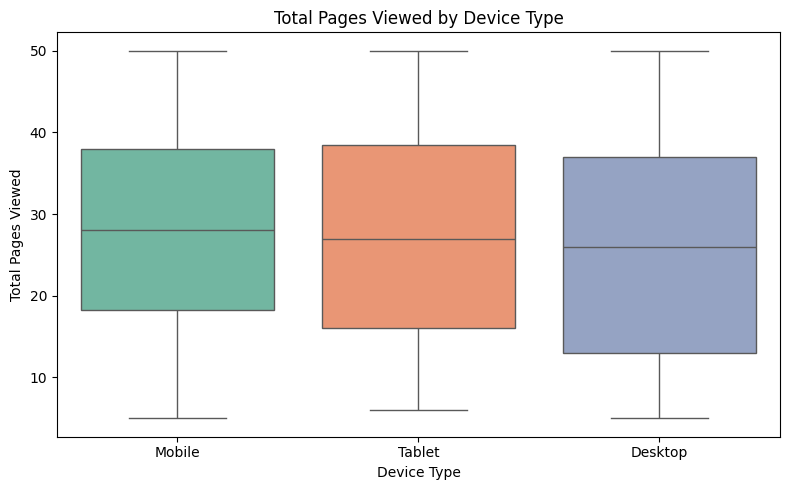

<ipython-input-16-2a2aeb9d5ff4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Device_Type', y=metric, data=df, palette='Set2')


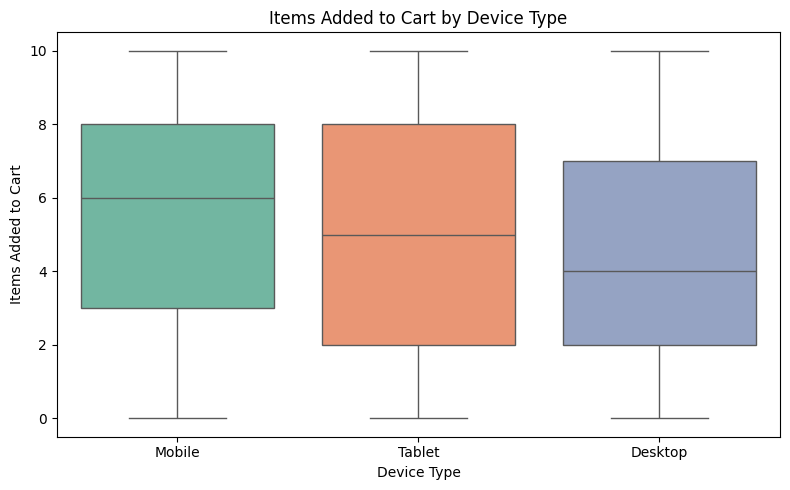

<ipython-input-16-2a2aeb9d5ff4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Device_Type', y=metric, data=df, palette='Set2')


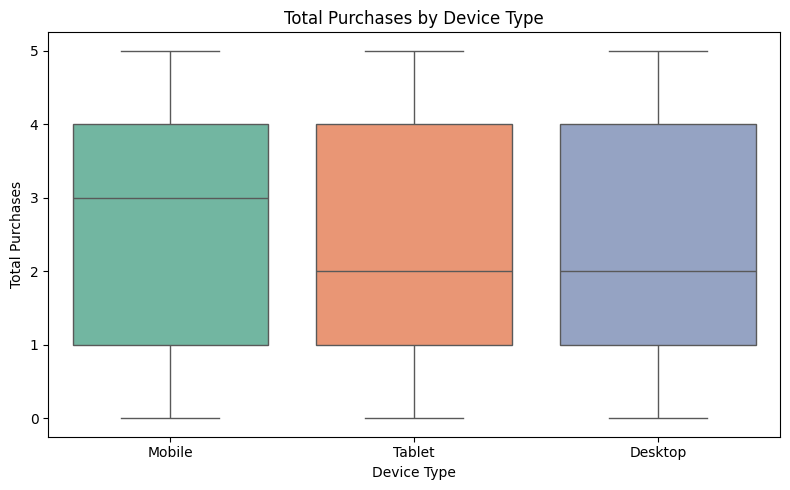

In [16]:
#Device usage analysis
#Exploring how different types of devices are used by customers
#and their impact on behavior.

behavior_metrics = ['Product_Browsing_Time', 'Total_Pages_Viewed', 'Items_Added_to_Cart', 'Total_Purchases']
# Defines a list of strings, where each string is the name of a column
#in the DataFrame that represents a customer behavior metric.

# Plot boxplots for each metric by Device_Type
# Starts a loop that will iterate through each item (metric name) in the
# 'behavior_metrics' list.
for metric in behavior_metrics:
    plt.figure(figsize=(8, 5))
    # Creates a new figure for each boxplot with a specified size
    #(width=8 inches, height=5 inches).
    #This ensures each boxplot is created on a separate plot.

    sns.boxplot(x='Device_Type', y=metric, data=df, palette='Set2')
    # Generates a boxplot. 'x=' specifies the column to use for the categories
    # (Device_Type), and 'y=' specifies the numerical column (the current
    # 'metric') for which the distribution will be shown. 'data=df' indicates
    # the DataFrame to use, and 'palette=' sets the color scheme for the
    # boxplots.

    plt.title(f'{metric.replace("_", " ")} by Device Type')
    # Sets the title of the current boxplot. The f-string dynamically includes
    # the current metric name, and '.replace("_", " ")' replaces underscores
    # with spaces for better readability in the title.

    plt.xlabel('Device Type')
    # Sets the label for the x-axis of the current boxplot.

    plt.ylabel(metric.replace("_", " "))
    # Sets the label for the y-axis of the current boxplot, also replacing
    # underscores with spaces in the metric name.

    plt.tight_layout()
    # Adjusts plot parameters for the current boxplot to give a tight layout and
    # prevent labels from overlapping.

    plt.show()
    # Displays the current boxplot.




Section 5.5

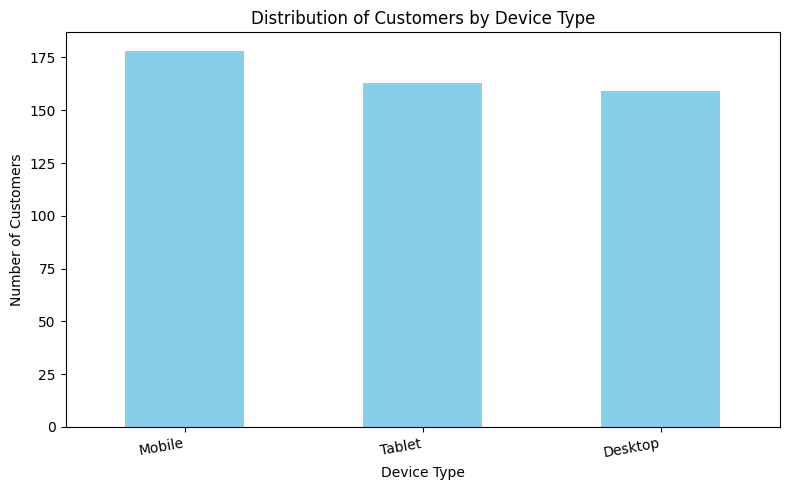

In [15]:
#Calculate the count of each device type
device_counts = df['Device_Type'].value_counts()

#Create a bar chart of the device type counts
plt.figure(figsize=(8, 5))
#Set the figure size for the bar chart
device_counts.plot(kind='bar', color='skyblue')
#Create the bar chart
plt.title('Distribution of Customers by Device Type')
# Add a title
plt.xlabel('Device Type')
#Set the x-axis label
plt.ylabel('Number of Customers')
#Set the y-axis label
plt.xticks(rotation=10, ha='right')
#Rotate x-axis labels for better readability
plt.tight_layout()
#Adjust layout to prevent labels overlapping
plt.show()
#Display the plot

# Section 6

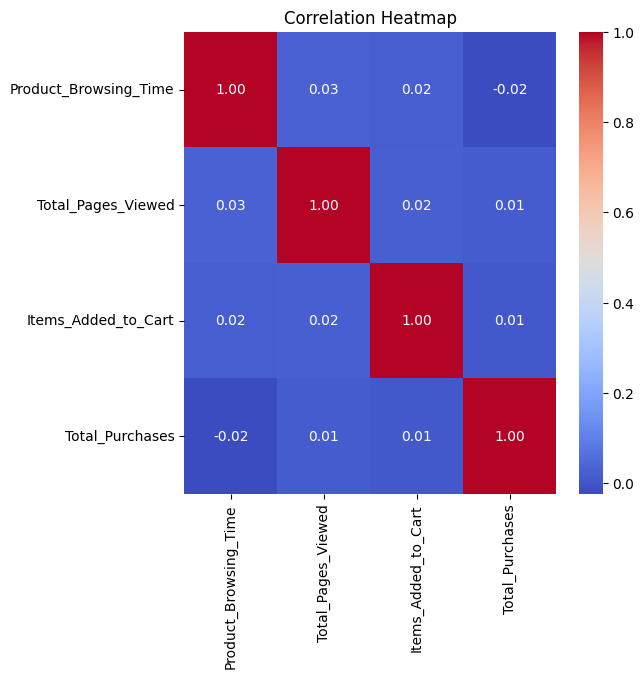

In [29]:
#Investigating the relationship between browsing time, pages viewed, items added to the cart, and actual purchases.

plt.figure(figsize=(6, 6))
#This sets up the space for our graph, making it 6 inches wide and 6 inches tall.

sns.heatmap(df[behavior_metrics].corr(), annot=True, cmap='coolwarm', fmt=".2f")
#This creates a heatmap graph. It looks at the selected columns in the 'df' data
#and calculates how much they influence each other ('corr()').
#The heatmap shows these relationships with colors ('cmap='coolwarm'') and numbers ('annot=True', 'fmt=".2f"').

plt.title('Correlation Heatmap')
#This adds a title to the graph so we know what we are looking at.

plt.show()
#This command displays the graph in the notebook.

Section 6.5

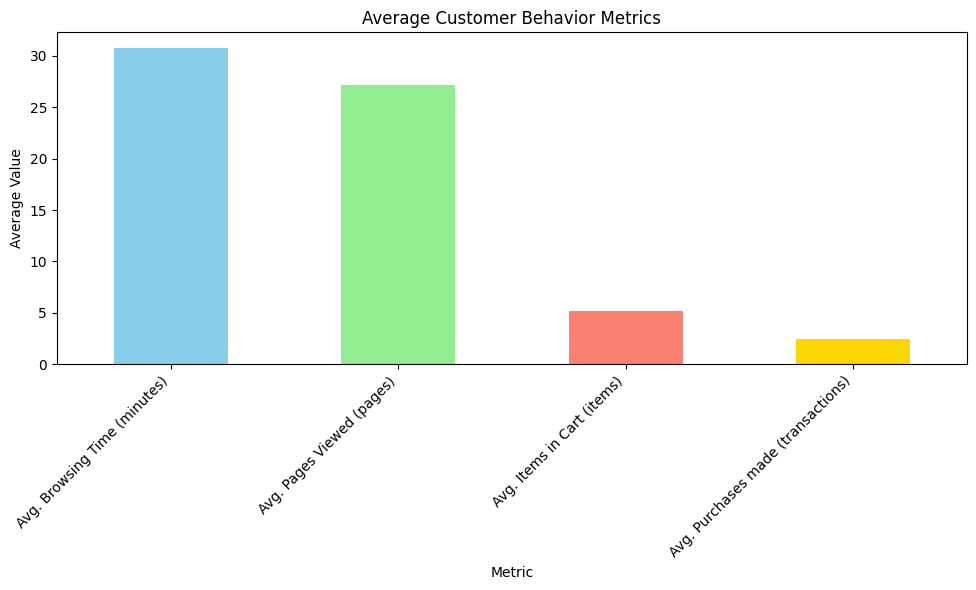

In [18]:
 # Calculate the average of the specified metrics
average_metrics = df[[
    'Product_Browsing_Time',
    'Total_Pages_Viewed',
    'Items_Added_to_Cart',
    'Total_Purchases'
]].mean()

# Rename the index for better readability (for plotting)
average_metrics_renamed = average_metrics.rename({
    'Product_Browsing_Time': 'Avg. Browsing Time (minutes)',
    'Total_Pages_Viewed': 'Avg. Pages Viewed (pages)',
    'Items_Added_to_Cart': 'Avg. Items in Cart (items)',
    'Total_Purchases': 'Avg. Purchases made (transactions)'
})

# Create a bar chart of the average metrics
plt.figure(figsize=(10, 6)) # Set the figure size
average_metrics_renamed.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'gold'])
# Create a bar chart with different colors
plt.title('Average Customer Behavior Metrics')
# Add a title
plt.xlabel('Metric')
# Set the x-axis label
plt.ylabel('Average Value')
# Set the y-axis label
plt.xticks(rotation=45, ha='right')
# Rotate x-axis labels for better readability
plt.tight_layout()
# Adjust layout
plt.show()

# Section 7

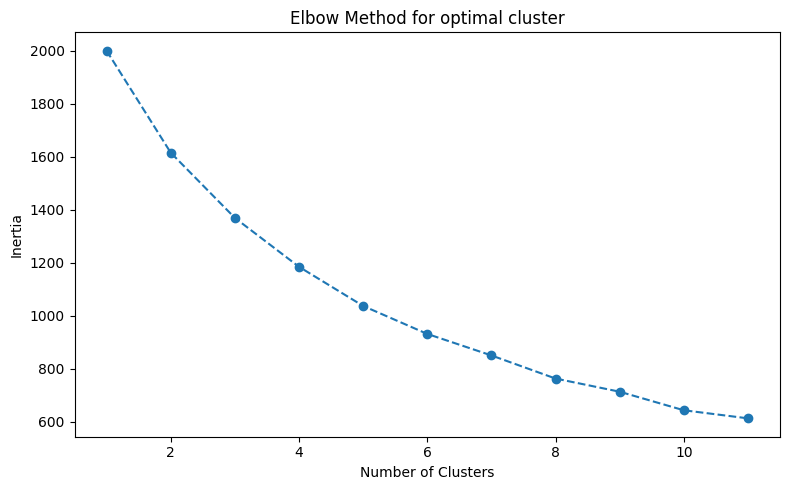

In [ ]:
# Segmenting customers based on their behavior and identifying distinct customer
# groups.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
x = df[behavior_metrics]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Using the elbow method to determine the optimal number of cluster
inertia = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

#plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 12), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for optimal cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()



#Section 8

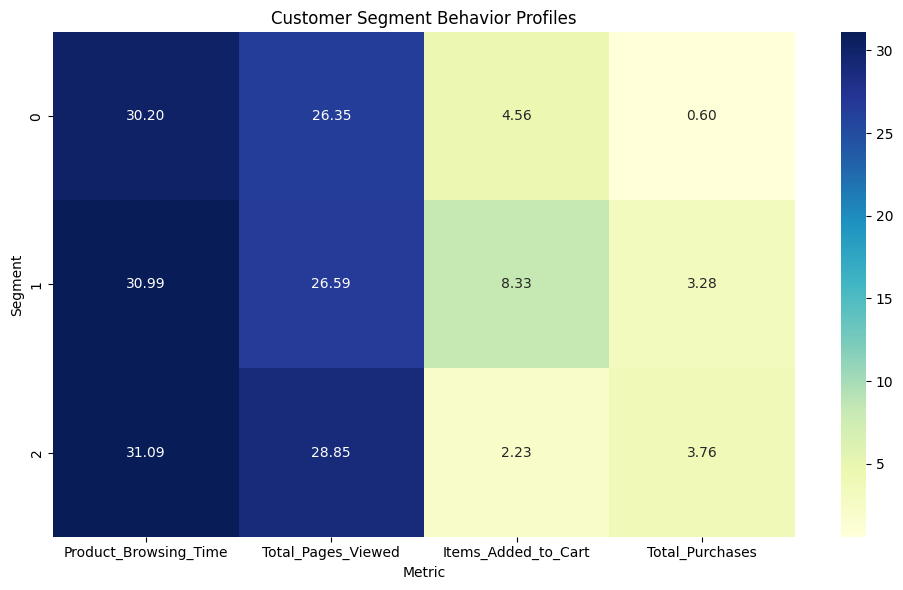

(         Product_Browsing_Time  Total_Pages_Viewed  Items_Added_to_Cart  \
 Segment                                                                   
 0                    30.201117           26.346369             4.564246   
 1                    30.994152           26.590643             8.327485   
 2                    31.093333           28.853333             2.226667   
 
          Total_Purchases  
 Segment                   
 0               0.597765  
 1               3.280702  
 2               3.760000  ,
 Segment
 0    179
 1    171
 2    150
 Name: count, dtype: int64)

In [ ]:
# To calculate ethe behavioural metrics, to Segment customers based on their
# behavior and identifying distinct customer groups.
#Apply KMeans with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(x_scaled)

# Calculate average behavior metrics per segment
segment_profiles = df.groupby('Segment')[behavior_metrics + ['Revenue'] if 'Revenue' in df else behavior_metrics].mean()

# Count of customers per segment
segment_counts = df['Segment'].value_counts().sort_index()

# Plot segment profiles
plt.figure(figsize=(10, 6))
sns.heatmap(segment_profiles, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Customer Segment Behavior Profiles')
plt.ylabel('Segment')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()

segment_profiles, segment_counts


#Section 9


<ipython-input-30-e744389d2266>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stage', y='Conversion Rate', data=conversion_df, palette='viridis')


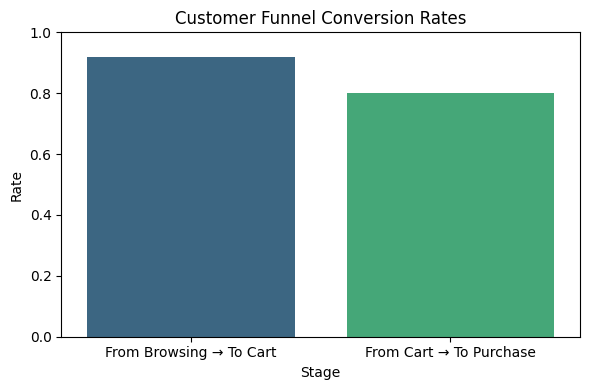

,Stage,Conversion Rate
0,From Browsing → To Cart,0.918
1,From Cart → To Purchase,0.802


In [30]:
# Analyzing the customer journey and identifying potential areas
#for improvement in the conversion funnel.
# Funnel Conversion Analysis

# Conversion rates at each stage
browsing_to_cart = (df['Items_Added_to_Cart'] > 0).mean()
cart_to_purchase = (df['Total_Purchases'] > 0).mean()

# Create conversion DataFrame
conversion_df = pd.DataFrame({
    'Stage': ['From Browsing → To Cart', 'From Cart → To Purchase'],
    'Conversion Rate': [browsing_to_cart, cart_to_purchase]
})

# Plot conversion rates
plt.figure(figsize=(6, 4))
sns.barplot(x='Stage', y='Conversion Rate', data=conversion_df, palette='viridis')
plt.title('Customer Funnel Conversion Rates')
plt.ylim(0, 1)
plt.ylabel('Rate')
plt.tight_layout()
plt.show()

conversion_df


#Section 10

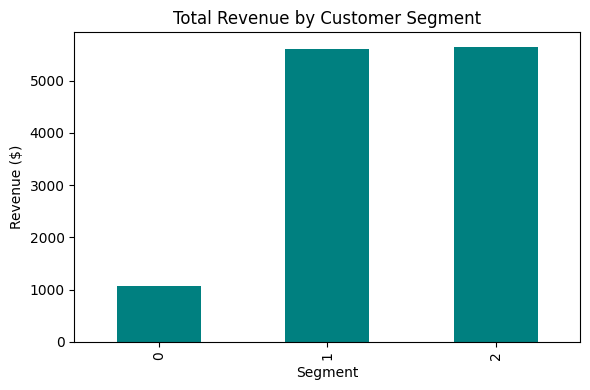

,Revenue
Segment,
0,1070
1,5610
2,5640


In [ ]:
# Assessing the impact of customer behavior on revenue generation and
# identifying opportunities for increasing sales and customer engagement.
# Assuming it cost $10 per purchase
PURCHASE_VALUE = 10
df['Revenue'] = df['Total_Purchases'] * PURCHASE_VALUE

# Revenue by customer segment
revenue_by_segment = df.groupby('Segment')['Revenue'].sum()

# Plot revenue by segment
plt.figure(figsize=(6, 4))
revenue_by_segment.plot(kind='bar', color='teal')
plt.title('Total Revenue by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

revenue_by_segment

Section 10.5

Percentage of Browsers: 0.40%
Percentage of Cart Droppers: 19.00%
Percentage of Impulse Buyers: 4.60%
Percentage of Loyal Buyers: 16.80%

Customer Type Distribution:


,Customer Type,Percentage
0,Browsers,0.4
1,Cart Droppers,19.0
2,Impulse Buyers,4.6
3,Loyal Buyers,16.8


<ipython-input-19-edd6e0d8490a>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Type', y='Percentage', data=customer_type_percentages, palette='viridis')


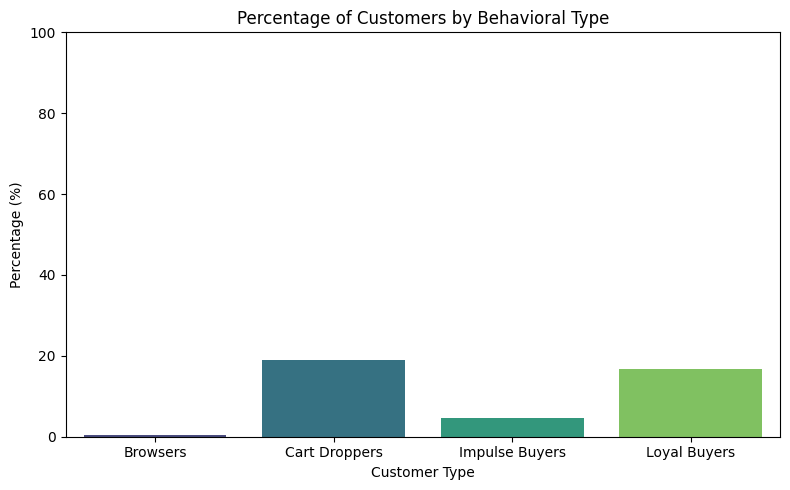

In [19]:
# First we define the criterias for each customer type based on behavioral metrics.
# These criterias are examples and might need adjustment based on data and business goals.

# Browsers: Customers who viewed many pages but didn't add items to the cart or make purchases.
# A possible criteria could be Total_Pages_Viewed > some threshold AND Items_Added_to_Cart == 0 AND Total_Purchases == 0
browser_criteria = (df['Total_Pages_Viewed'] > df['Total_Pages_Viewed'].quantile(0.75)) & \
                   (df['Items_Added_to_Cart'] == 0) & \
                   (df['Total_Purchases'] == 0)

# Cart Droppers: Customers who added items to the cart but didn't complete a purchase.
# Criteria: Items_Added_to_Cart > 0 AND Total_Purchases == 0
cart_dropper_criteria = (df['Items_Added_to_Cart'] > 0) & \
                        (df['Total_Purchases'] == 0)

# Impulse Buyers: Customers with relatively low browsing time/pages viewed but high total purchases.
# Criteria: Product_Browsing_Time < some threshold AND Total_Pages_Viewed < some threshold AND Total_Purchases > 0
impulse_buyer_criteria = (df['Product_Browsing_Time'] < df['Product_Browsing_Time'].quantile(0.25)) & \
                          (df['Total_Pages_Viewed'] < df['Total_Pages_Viewed'].quantile(0.25)) & \
                          (df['Total_Purchases'] > 0)

# Loyal Buyers: Customers with high total purchases.
# Criteria: Total_Purchases > some threshold
loyal_buyer_criteria = (df['Total_Purchases'] > df['Total_Purchases'].quantile(0.75))


total_customers = len(df)

num_browsers = df[browser_criteria].shape[0]
num_cart_droppers = df[cart_dropper_criteria].shape[0]
num_impulse_buyers = df[impulse_buyer_criteria].shape[0]
num_loyal_buyers = df[loyal_buyer_criteria].shape[0]

# Calculate the percentage of each category among all customers.
percent_browsers = (num_browsers / total_customers) * 100
percent_cart_droppers = (num_cart_droppers / total_customers) * 100
percent_impulse_buyers = (num_impulse_buyers / total_customers) * 100
percent_loyal_buyers = (num_loyal_buyers / total_customers) * 100

# Print the results.
print(f"Percentage of Browsers: {percent_browsers:.2f}%")
print(f"Percentage of Cart Droppers: {percent_cart_droppers:.2f}%")
print(f"Percentage of Impulse Buyers: {percent_impulse_buyers:.2f}%")
print(f"Percentage of Loyal Buyers: {percent_loyal_buyers:.2f}%")

customer_type_percentages = pd.DataFrame({
    'Customer Type': ['Browsers', 'Cart Droppers', 'Impulse Buyers', 'Loyal Buyers'],
    'Percentage': [percent_browsers, percent_cart_droppers, percent_impulse_buyers, percent_loyal_buyers]
})

print("\nCustomer Type Distribution:")
display(customer_type_percentages)

#Plot the percentages
plt.figure(figsize=(8, 5))
sns.barplot(x='Customer Type', y='Percentage', data=customer_type_percentages, palette='viridis')
plt.title('Percentage of Customers by Behavioral Type')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
# Set y-axis limit to 0-100%
plt.tight_layout()
plt.show()